## Gradient Descent

Before entering into the second part, let's have a recap of the first part:  
+ These are the things done in the first part:
    + create a linear model
    + iterate over the weight from 0 to 5
    + calculate the loss using the loss function define in the model
    + plot the loss vs. weight
    + determine the opt weight using your EYES...

Everything seems goood, except the last step, i.e. *determine the opt weight using your EYES*, which seems too stupid for an engineer and not is not realistic in real case (since in reality the cost function will be way more than 1 dim).  
Therefore, in this part we will use gradient descent, i.e. go to the opposite direction 
of the gra, and the opt (min) can be found after several iterations..

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Define the model:

In [6]:
# Define our model:
class GradDescentModel:
    def __init__(self, weight):
        self.weight = weight

    def forward(self, input_x):
        return input_x * self.weight

    # for traditional grad descent, we will not use loss function
    # we use cost function instead.
    # Again
    # Differences? -> loss refers to single sample
    #              -> cost refers to average error over all samples
    def cost_function(self, input_x, true_output_y):
        loss = 0
        for x, y in zip(input_x, true_output_y):
            output_prediction = self.forward(x)
            # sum up all the losses for later averaging
            loss += (output_prediction - y) ** 2
        return loss / len(input_x)

    def grad(self, input_x, output_y):
        # reset grad after using it
        grad = 0
        # accumulate all the grad of the sample and calc. its average
        for x, y in zip(input_x, output_y):
            grad += 2 * x * (x * self.weight - y)
        return grad / len(input_x)

# Define initial value in here:
weight = 1
lr = 0.01   # can try play with learning rate here

# Training set
x = np.arange(1.0, 10.0, 1.0)
y = 3 * x

# Initialize some data for plotting
epoch_list = []
cost_list = []

### Step 2: Iterating and trying to find opt weight using GD:

To find the opt weight, we go to the opposite direction of the grad:
$$
\omega_n=\omega_{n-1}-\alpha\cdot \frac{\partial{cost(\omega)}}{\partial{\omega}}\\
$$
$$
\frac{\partial cost(\omega)}{\partial \omega} = \frac{\partial}{\partial \omega} \frac{1}{N} \sum_{n=1}^{N} (x_n \cdot \omega - y_n)^2\\
= \frac{1}{N} \sum_{n=1}^{N} \frac{\partial}{\partial \omega} (x_n \cdot \omega - y_n)^2\\
= \frac{1}{N} \sum_{n=1}^{N} 2 \cdot (x_n \cdot \omega - y_n) \frac{\partial (x_n \cdot \omega - y_n)}{\partial \omega}\\
= \frac{1}{N} \sum_{n=1}^{N} 2 \cdot x_n \cdot (x_n \cdot \omega - y_n)
$$

Therefore we can use the following equation to update the weight:
$$
\omega = \omega - \alpha \frac{1}{N} \sum_{n=1}^{N} 2 \cdot x_n \cdot (x_n \cdot \omega - y_n)
$$
where $\alpha$ is known as **learning rate**.

In [7]:
print('Before starting, the weight is: ', weight)

for epoch in range(100):
    model = GradDescentModel(weight)
    cost_validation = model.cost_function(x, y)
    grad_validation = model.grad(x, y)
    weight -= lr * grad_validation
    print('Epoch = ', epoch, '\t | Weight = ', weight, '\t | Cost = ', cost_validation)
    cost_list.append(cost_validation)
    epoch_list.append(epoch)
print('After starting, the weight is: ', weight)


Before starting, the weight is:  1
Epoch =  0 	 | Weight =  2.2666666666666666 	 | Cost =  126.66666666666667
Epoch =  1 	 | Weight =  2.7311111111111113 	 | Cost =  17.029629629629635
Epoch =  2 	 | Weight =  2.9014074074074077 	 | Cost =  2.289539094650203
Epoch =  3 	 | Weight =  2.9638493827160497 	 | Cost =  0.3078158116140817
Epoch =  4 	 | Weight =  2.9867447736625516 	 | Cost =  0.04138412578367042
Epoch =  5 	 | Weight =  2.995139750342936 	 | Cost =  0.00556386579980449
Epoch =  6 	 | Weight =  2.9982179084590763 	 | Cost =  0.0007480308464181112
Epoch =  7 	 | Weight =  2.9993465664349945 	 | Cost =  0.00010056859157400222
Epoch =  8 	 | Weight =  2.9997604076928313 	 | Cost =  1.3520888422731728e-05
Epoch =  9 	 | Weight =  2.9999121494873715 	 | Cost =  1.817808332390302e-06
Epoch =  10 	 | Weight =  2.9999677881453697 	 | Cost =  2.443942313545693e-07
Epoch =  11 	 | Weight =  2.9999881889866353 	 | Cost =  3.285744665958554e-08
Epoch =  12 	 | Weight =  2.999995669295099

### Step 3: Plotting the cost vs. epoch

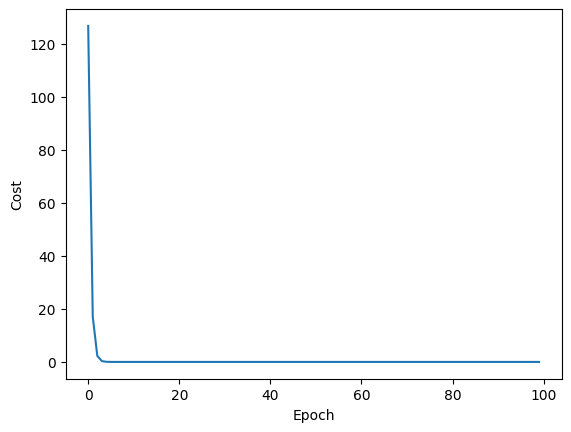

In [8]:
plt.plot(epoch_list, cost_list)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()